In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_variance(func):
        def wrap(a):
            x_mean=np.mean(a)
            temp_x=[t**2 for t in a-x_mean]
            variance_x=np.sum(temp_x)/(len(a))
            s_x=variance_x**0.5
            dic={'Mean':x_mean,'Variance':variance_x,'Standard_Deviation':s_x}
            return dic

        return wrap
@get_variance
def get_standard_deviation(a):
        pass

In [3]:
 def covariance(func):
        def wrap(a,b):
            x=get_standard_deviation(a)
            y=get_standard_deviation(b)
            temp_xy=(np.sum((a-x['Mean'])*(b-y['Mean'])))/(x['Standard_Deviation']*y['Standard_Deviation'])
            coefficient_r=temp_xy/len(a)
            return (coefficient_r,x,y)
        return wrap
@covariance
def get_coefficient(a,b):
        pass
    

In [4]:
def get_eqaution(a,b):
    c=get_coefficient(a,b)
    slope=c[0]*(c[2]['Standard_Deviation']/c[1]['Standard_Deviation'])
    intercept=c[2]['Mean']-c[1]['Mean']*slope
    return f'y={slope}x+{intercept}'

In [5]:
class my_LinearRegression:
    def __init(self):
        self.x=[]
        self.y=[]
        self.variance_x=0
        self.variance_y=0
        self.s_x=0
        self.s_y=0
        self.coefficient_r=0
    def get_outliers(self,x):
        x=np.array(x.sort_values())
        med=np.median(x)
        med=len(x)//2
        q1=x[:med]
        q3=x[med+1:]
        med_1=q1[len(q1)//2]
        med_3=q3[len(q3)//2]
        iqr=med_3-med_1
        out_1=x[x<(med_1-(1.5*iqr))]
        out_2=x[x>(med_3+(1.5*iqr))]
        outliers=np.concatenate([out_1,out_2])
        return outliers
            
    
    
    
    
    
    
    def get_variance(func):
        def wrap(self,a):
            
            x_mean=np.mean(a)
            temp_x=[t**2 for t in a-x_mean]
            variance_x=np.sum(temp_x)/(len(a))
            s_x=variance_x**0.5
            dic={'Mean':x_mean,'Variance':variance_x,'Standard_Deviation':s_x}
            return dic

        return wrap
    
    @get_variance
    def get_standard_deviation(self,a):
        pass
    
    
    def covariance(func):
        def wrap(self):
            a=self.x
            b=self.y
            temp_x=self.get_standard_deviation(a)
            temp_y=self.get_standard_deviation(b)
            self.x_variance_x=temp_x['Variance']
            self.s_x=temp_x['Standard_Deviation']
            self.y_variance=temp_y['Variance']
            self.s_y=temp_y['Standard_Deviation']
            temp_xy=(np.sum((a-temp_x['Mean'])*(b-temp_y['Mean'])))/(temp_x['Standard_Deviation']*temp_y['Standard_Deviation'])
            coefficient_r=temp_xy/len(a)
            return (coefficient_r,temp_x,temp_y)
        return wrap
    
    @covariance
    def get_coefficient(self):
        pass
    
    
    def get_equation(self):
        c=self.get_coefficient()
        self.coefficient_r=c[0]
        self.slope=c[0]*(c[2]['Standard_Deviation']/c[1]['Standard_Deviation'])
        self.intercept=c[2]['Mean']-c[1]['Mean']*self.slope
        return f'y={self.slope}x+({self.intercept})'
    
    
    def fit(self,a,b):
        try:
            df = pd.DataFrame({'X': np.array(a).flatten(),'y':np.array(b).flatten()})
            df=df.loc[(~df['X'].isin(self.get_outliers(df.X))) & (~df['y'].isin(self.get_outliers(df.y)))]
            self.x=np.array(df['X'])
            self.y=np.array(df['y'])
            self.equation=self.get_equation()
        except:
            raise
    def predict(self,x_test,y_test):
        res=[]
        
        for i in x_test:
            res.append(self.slope*i+self.intercept)
            
        y_predict=res
        
        r_squa=self.r_squared(y_test,y_predict)
        
        n = len(y_test)
        
        rmse = np.sqrt(np.sum((y_test - y_predict)**2) / n)
        
        return (f'The model has R-Sqaured = {r_squa} and RMSE={rmse}',y_predict)
    
    def r_squared(self, y_test, y_predict):
        mean_actual = np.mean(y_test)
        r_squared = 1 - (np.sum((y_test - y_predict)**2) / np.sum((y_test - mean_actual)**2))
        return r_squared

    def __repr__(self):
        return f'The model has the equation as {self.equation}'

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)
np.random.seed(42)
X_new = np.random.randint(1, 101, size=(100,))
y_new = 3 * X_new ** 1.5 - 5 * X_new + 10 + 0.1 * X_new ** 3 + np.random.normal(scale=20, size=(100,)) + 10 * np.sin(0.1 * X_new ** 2)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Create and train the model
model1 = my_LinearRegression()
model1.fit(X_train, y_train)

# Make predictions and evaluate the model
results, y_predict_my = model1.predict(X_test, y_test)
print(results)

# Print the model's equation
print(model1)




The model has R-Sqaured = 0.8068721884744532 and RMSE=12501.400431699813
The model has the equation as y=869.4082238921319x+(-17061.633843936834)


In [7]:
model = LinearRegression()

# Reshape the data to be 2D arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print model parameters and evaluation metrics
print(f"The model has the equation as y = {model.coef_[0]}x + {model.intercept_}")
print(f"The model has R-Squared = {r_squared}")
print(f"The model has RMSE = {rmse}")

The model has the equation as y = 869.408223892132x + -17061.63384393684
The model has R-Squared = 0.8068721884744532
The model has RMSE = 12501.400431699813


In [8]:
import matplotlib.pyplot as plt

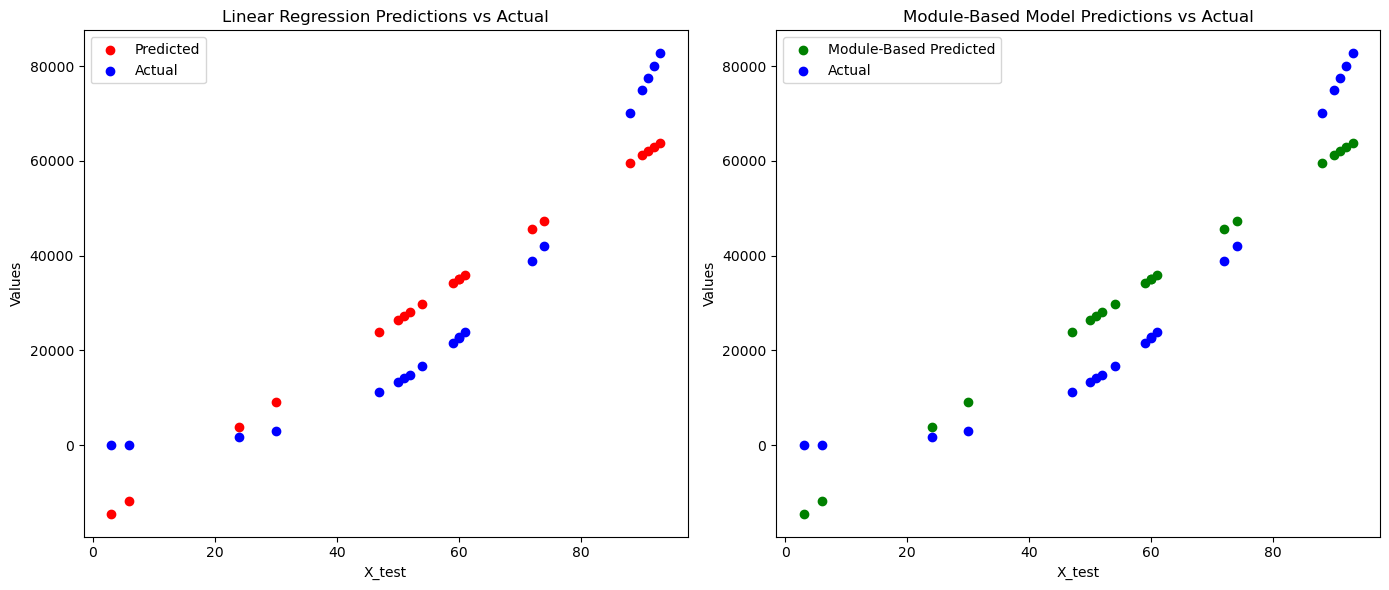

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the model predictions
ax1.scatter(X_test, y_pred, color='r', label='Predicted')
ax1.scatter(X_test, y_test, color='b', label='Actual')
ax1.set_xlabel('X_test')
ax1.set_ylabel('Values')
ax1.set_title('Linear Regression Predictions vs Actual')
ax1.legend()

# Plot the module-based model predictions
ax2.scatter(X_test, y_predict_my, color='g', label='Module-Based Predicted')
ax2.scatter(X_test, y_test, color='b', label='Actual')
ax2.set_xlabel('X_test')
ax2.set_ylabel('Values')
ax2.set_title('Module-Based Model Predictions vs Actual')
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()